In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

After preprocessing
After_filling_Nans



In [2]:
df_pre = pd.read_pickle('../input/After_filling_Nans')

In [3]:
df = pd.read_pickle('../input/After preprocessing')

In [ ]:
summary = np.array(df['Summary'])
score = df['score'].values

## **Featurizer - Bag of words** (Unigram)
## Models - Naive bayes,  Logistic regression, SVM  

In [ ]:
# Hyperparameter tuning for MultinomialNB 
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
start_time = time.time()
best_params = [] #store best parameters for MultinomialNB
parameters = {'alpha':[i for i in range(1,100,10)]} 
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0

print("--- %s seconds ---" % (time.time() - start_time))

--- 952.986083984375 seconds ---


In [ ]:
##Confusion matrix
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, false negative, true positive
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN # Total num of examples

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

Confusion matrix:
 [[140915  13778]
 [  9455 144980]]


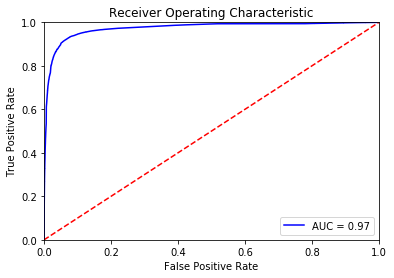

The log loss for the Naive bayes is: 0.266041112371


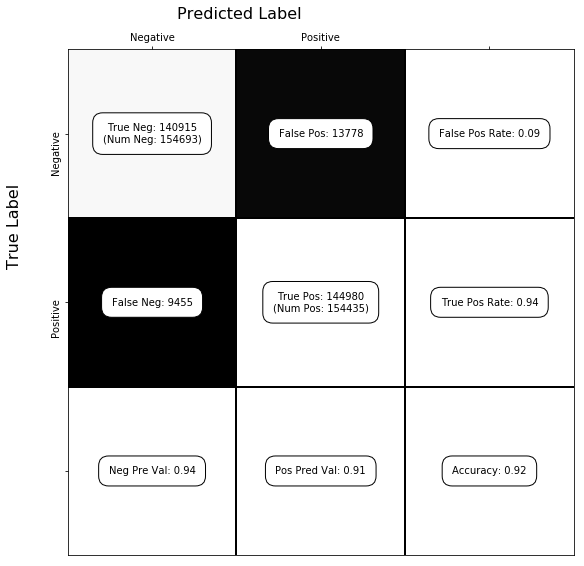

Precision : 91.3213822296
Recall : 93.8776831677
The accuracy is 92.48 %
------------ 1.5943827629089355 seconds ------------


In [ ]:
start_time = time.time()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))
print('------------ %s seconds ------------'%(time.time()-start_time))

In [ ]:
#Logistic regression hyperparameter tuning
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
start_time = time.time()
best_params_logreg = []
parameters = {'loss' :['log'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
warnings.filterwarnings('ignore')
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_logreg.append(clf.best_params_)
print('Best parameters for Logistic Regression are:',best_params_logreg)
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for Logistic Regression are: [{'alpha': 0.1, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'}]
--- 408.2074453830719 seconds ---


Confusion matrix:
 [[135589  19104]
 [ 20694 133741]]


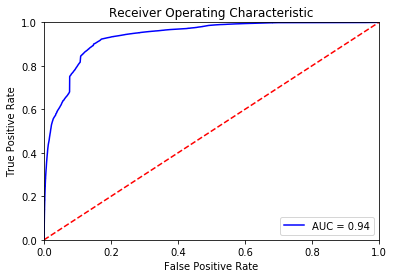

The log loss for the Logistic regression is: 0.551788808409


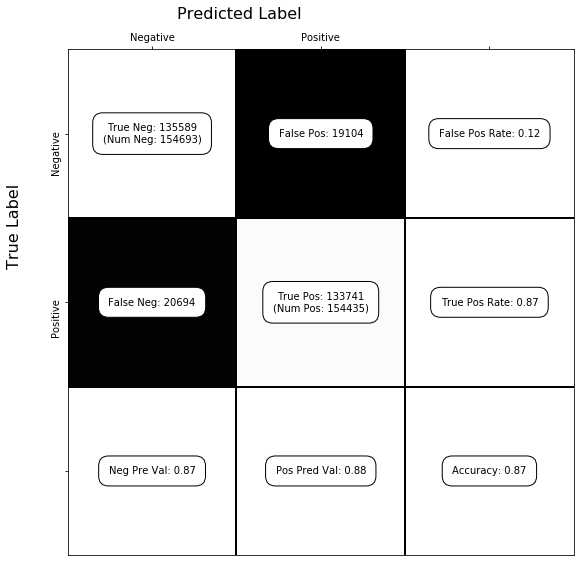

Precision : 87.5010631686
Recall : 86.6001877813
The accuracy is 87.13 %


In [ ]:
clf = SGDClassifier(loss = 'log',penalty = 'l2',alpha = 0.1, n_jobs = -1)
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_log_ref = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n",conf_log_ref)
#ROC for a given hyperparameters for logistic regression
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Logistic regression is:",a)

#print confusion matrix
show_confusion_matrix(conf_log_ref,['Negative','Positive'])

#Precision and recall
tn = conf_log_ref[0,0]; fp = conf_log_ref[0,1]; fn = conf_log_ref[1,0]; tp = conf_log_ref[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_log_ref[0][0]
tn = conf_log_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

In [ ]:
#SVM hyperparameter tuning
start_time = time.time()
best_params_SVM = []
parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_SVM = clf.best_params_
print("Best hyperparameters for linear SVM:",best_params_SVM)
print('------{} seconds-------'.format(time.time()-start_time))

Best hyperparameters for linear SVM: {'alpha': 0.1, 'loss': 'hinge', 'n_jobs': -1, 'penalty': 'l2'}
------402.9957890510559 seconds-------


Confusion matrix:
 [[141114  13579]
 [ 26478 127957]]


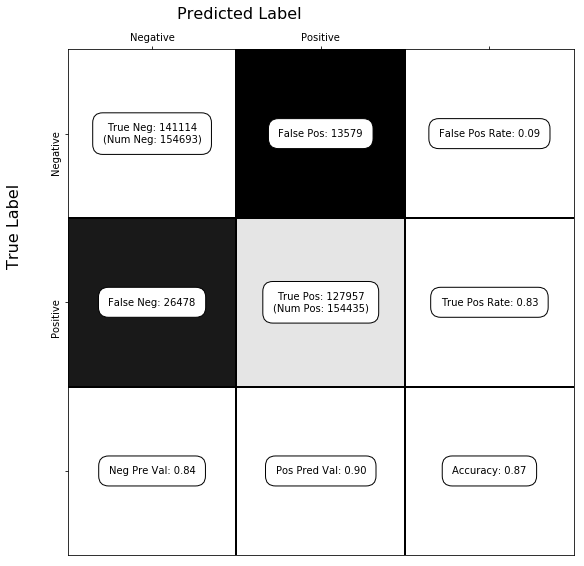

Precision : 90.4059744517
Recall : 82.854922783
The accuracy is 87.04 %


In [ ]:
#Linear SVM
clf = SGDClassifier(penalty = 'l2', alpha = 0.1, n_jobs =  -1, loss = 'hinge')
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_SVM_ref = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",conf_SVM_ref)
#print confusion matrix
show_confusion_matrix(conf_SVM_ref,['Negative','Positive'])
#Precision and recall
tn = conf_SVM_ref[0,0]; fp = conf_SVM_ref[0,1]; fn = conf_SVM_ref[1,0]; tp = conf_SVM_ref[1,1];
precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)
print("Precision :",precision)
print("Recall :",recall)
tp = conf_SVM_ref[0][0]
tn = conf_SVM_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

## **Bi-gram** : MultinomialNB , Logistic Regression, SVM

In [ ]:
# Hyperparameter tuning for MultinomialNB with Bigrams
start_time = time.time()
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(ngram_range=(1,2),max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
print('-------- %s seconds -------'%(time.time()-start_time))

-------- 1420.8025479316711 seconds -------


Confusion matrix:
 [[143243  11450]
 [ 10369 144066]]


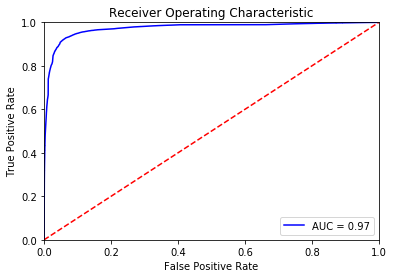

The log loss for the Naive bayes is: 0.327104143939


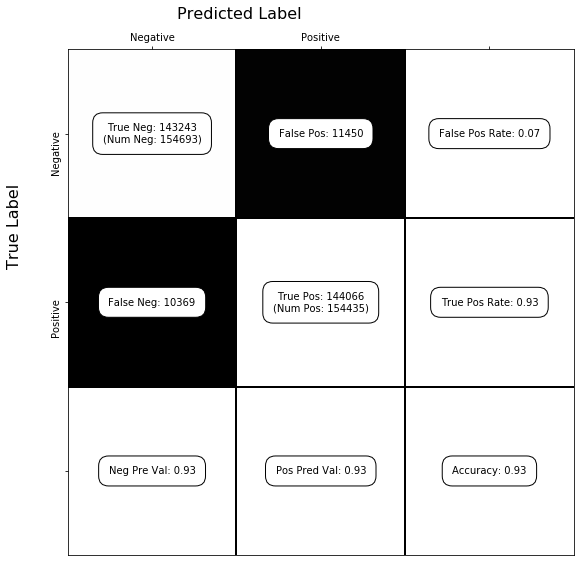

Precision : 92.6374135137
Recall : 93.2858484152
The accuracy is 92.94 %


In [ ]:
# MultinomialNb with Bigrams
score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

## **TF-IDF**

In [ ]:
# Hyperparameter tuning for MultinomialNB with Bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
start_time = time.time()
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = TfidfVectorizer(max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
print('-------- %s seconds -------'%(time.time()-start_time))

-------- 965.2078900337219 seconds -------


Confusion matrix:
 [[140884  13809]
 [  9570 144865]]


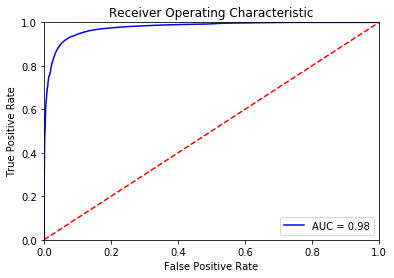

The log loss for the Naive bayes is: 0.20514427568


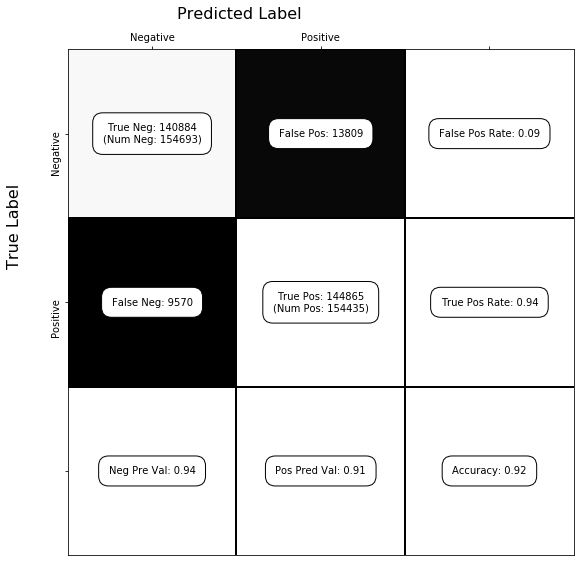

Precision : 91.2972509674
Recall : 93.8032181824
The accuracy is 92.44 %


In [ ]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

## **Word2Vec**

In [ ]:
#loading the positive reviews and negative reviews to a single column as text
pos_reviews = df_pre['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df_pre['Negative_Review'].values
neg_reviews = neg_reviews.tolist()
text_df = pd.DataFrame()
text_df['Reviews'] = pos_reviews+neg_reviews


In [ ]:
#Train Word2Vec model using the own corpus
import gensim
i=0
list_of_sent = []
for sent in text_df['Reviews'].values:
    filtered_sentence = []
    for w in sent.split():
        for word in w.split():
            if(word.isalpha()):
                filtered_sentence.append(word.lower())
            else:
                continue
    list_of_sent.append(filtered_sentence)

In [ ]:
print(text_df['Reviews'].values[15435])
print('***************************************************************')
print(list_of_sent[15435])

 View over Thames from our bed was awesome Lighting in room was well thought out Real coffee machine was a bonus Toiletries provided were extensive 
***************************************************************
['view', 'over', 'thames', 'from', 'our', 'bed', 'was', 'awesome', 'lighting', 'in', 'room', 'was', 'well', 'thought', 'out', 'real', 'coffee', 'machine', 'was', 'a', 'bonus', 'toiletries', 'provided', 'were', 'extensive']


In [ ]:
start_time = time.time()
w2v_model = gensim.models.Word2Vec(list_of_sent,min_count=5, size=50, workers=4)
print('----------- %s seconds ------------'%(time.time()-start_time))

----------- 52.35372281074524 seconds ------------


In [ ]:
words = list(w2v_model.wv.vocab)
print(len(words))

20501


In [ ]:
w2v_model.wv.similarity('dinner','lunch')

0.9462000667468814

In [ ]:
w2v_model.wv.most_similar('tasty')

[('delicious', 0.8978936672210693),
 ('plentiful', 0.893740177154541),
 ('rich', 0.870803952217102),
 ('varied', 0.859499454498291),
 ('yummy', 0.841732382774353),
 ('buffett', 0.8114312291145325),
 ('diverse', 0.8113470077514648),
 ('hearty', 0.8092824220657349),
 ('abundant', 0.7996855974197388),
 ('comprehensive', 0.772368848323822)]

In [ ]:
w2v_model.wv.most_similar('comfortable')

[('comfy', 0.9398742318153381),
 ('confortable', 0.8473700284957886),
 ('confy', 0.8093051910400391),
 ('comfotable', 0.7921937704086304),
 ('comfi', 0.7389313578605652),
 ('supercomfortable', 0.7299176454544067),
 ('comfty', 0.6964067220687866),
 ('comforable', 0.6929575800895691),
 ('conformable', 0.6901895999908447),
 ('heavenly', 0.6770438551902771)]

In [ ]:
w2v_model.wv.most_similar('london')

[('paris', 0.9324385523796082),
 ('amsterdam', 0.9230793118476868),
 ('vienna', 0.9017142057418823),
 ('barcelona', 0.8981909155845642),
 ('milan', 0.8852142691612244),
 ('city', 0.7993401885032654),
 ('milano', 0.7148131132125854),
 ('town', 0.7081930637359619),
 ('europe', 0.6947908401489258),
 ('greenwich', 0.6789199113845825)]

In [ ]:
w2v_model.wv.most_similar('europe')

[('italy', 0.8877943754196167),
 ('spain', 0.8571958541870117),
 ('austria', 0.8338485360145569),
 ('uk', 0.7926173210144043),
 ('paris', 0.7720497846603394),
 ('european', 0.7200106382369995),
 ('cities', 0.7140976786613464),
 ('vienna', 0.712244987487793),
 ('england', 0.7108560800552368),
 ('countries', 0.7010495662689209)]

In [ ]:
w2v_model.wv.most_similar(positive=['woman', 'king'], negative=['man'] ,topn=1 )

[('queen', 0.8911489844322205)]

In [ ]:
w2v_model.most_similar(positive=['happy', 'sad'], negative=['annoy'], topn=1)

[('pleased', 0.7336244583129883)]

## The results look very promising. Word2vec is pretty good in understanding the semantics.

 # **Avg W2V, TFIDF-W2V**

In [ ]:
# average Word2Vec
#computing avg_word2vec for each review

sent_vectors = []
for sent in list_of_sent:
    sent_vec = np.zeros(50)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

1030424
50
